In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import json
import math
from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import stats
from scipy.stats import gaussian_kde

from scipy.spatial import ConvexHull, convex_hull_plot_2d

from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

from scipy.signal import argrelextrema,argrelmax

from itertools import chain

from scipy import optimize

from sklearn.linear_model import LinearRegression

210.csv


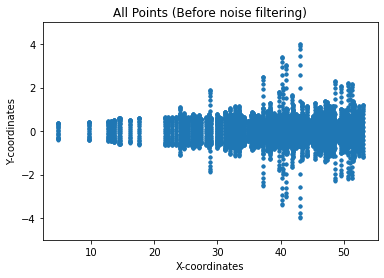

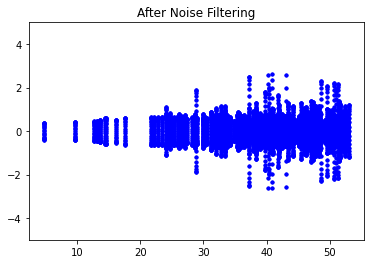

211.csv


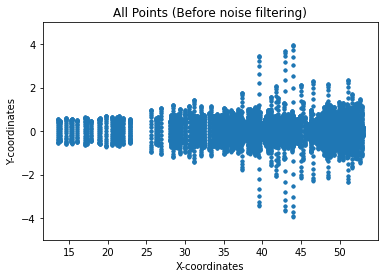

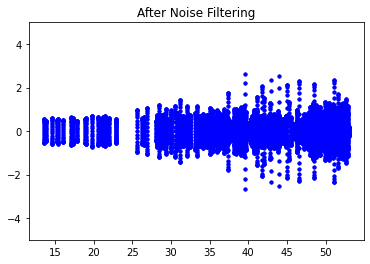

212.csv


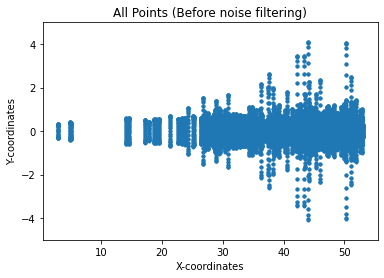

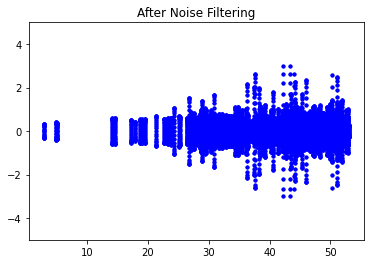

213.csv


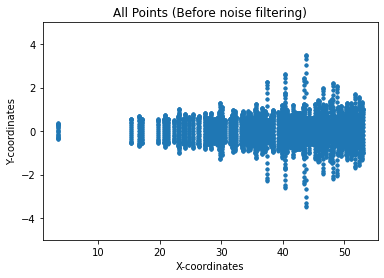

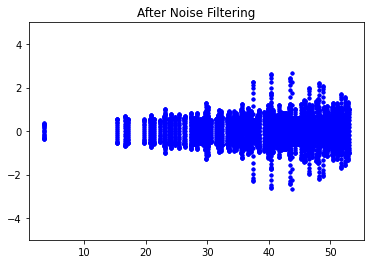

214.csv


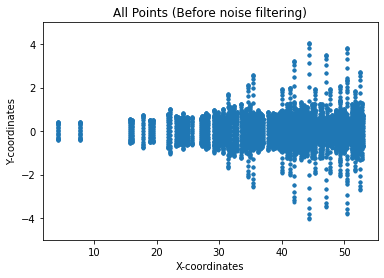

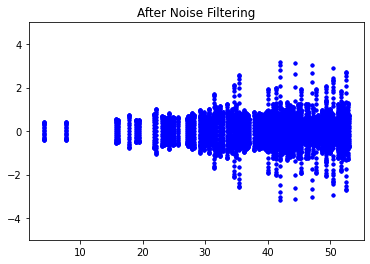

215.csv


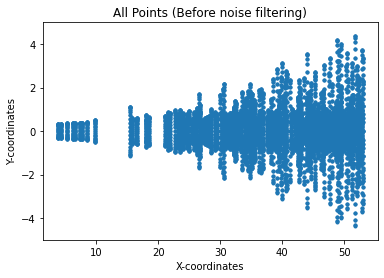

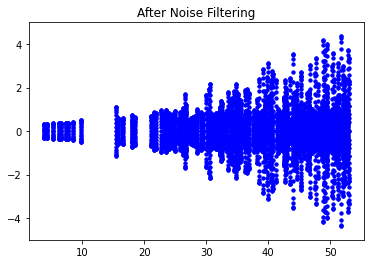

216.csv


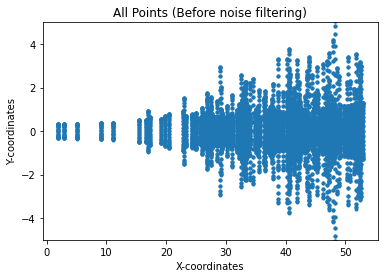

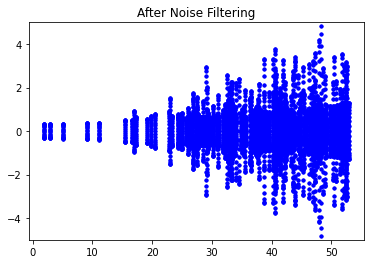

217.csv


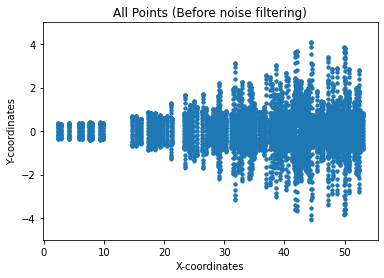

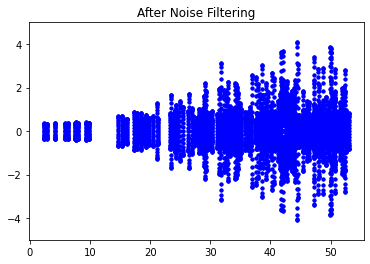

218.csv


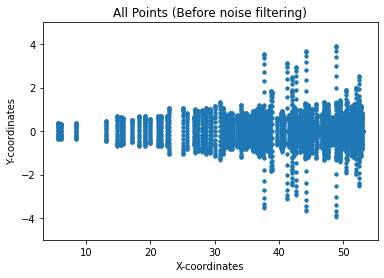

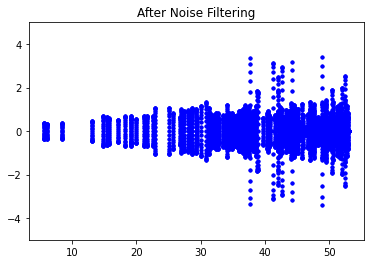

219.csv


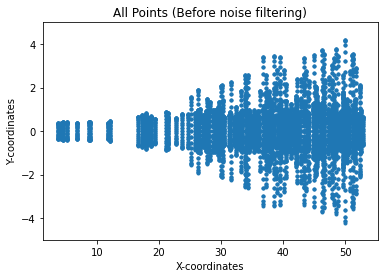

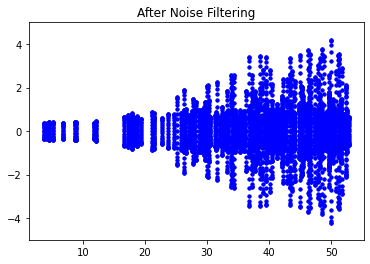

In [8]:
epsilon = 5

folders = ['newData']

for folder in folders:
    onlyfiles = [f for f in listdir("data/input/{}".format(folder)) ]
    for file in onlyfiles:
        df = pd.read_csv('data/input/{}/{}'.format(folder,file))
        print(file)
        x = df['Points:0'].to_numpy()
        y = df['Points:1'].to_numpy()
        
        plt.figure()
        plt.title('All Points (Before noise filtering)')
        plt.xlabel('X-coordinates')
        plt.ylabel('Y-coordinates')
        plt.plot(x,y, '.')
        plt.ylim([-5,5])
        plt.show()
        
        positive = df.loc[df['Points:1'] >= 0]
        xPositive = positive['Points:0'].to_numpy()
        yPositive = positive['Points:1'].to_numpy()
        stdY = np.std(yPositive)
        
        
        outline = positive.groupby('Points:0')['Points:1'].max().reset_index()
        outline.columns = ['x', 'y']
        
        xOutline = outline['x'].to_numpy()
        yOutline = outline['y'].to_numpy()
        
        # assemble matrix A
        A = np.vstack([xOutline, np.ones(len(xOutline))]).T

        # turn y into a column vector
        yOutlineColumn = yOutline[:, np.newaxis]
        
        # Direct least square regression
        alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),yOutlineColumn)
        
        outlineDict = {}

        for i in range(len(xOutline)):
            outlineDict[xOutline[i]] = alpha[0]*xOutline[i] + alpha[1]
            
        # plot the results
#         plt.figure()
#         plt.title('Least Squares Linear Regression Line (outline points)')
#         plt.plot(xOutline, yOutlineColumn, 'b.')
#         plt.plot(xOutline, alpha[0]*xOutline + alpha[1], 'r')
#         plt.xlabel('x')
#         plt.ylabel('y')
#         plt.show()

        pX = []
        pY = []

        nX = []
        nY = []

        for i in range(0, len(yPositive)):
            if (yPositive[i] - outlineDict[xPositive[i]]) <= (epsilon * stdY) : 
                pX.append(xPositive[i])
                pY.append(yPositive[i])

                nX.append(xPositive[i])
                nY.append(-yPositive[i])

        plt.figure()
        plt.title('After Noise Filtering')
        plt.ylim([-5,5])
        plt.plot(nX, nY, 'b.')
        plt.plot(pX, pY, 'b.')
        plt.show()